In [1]:
#!conda install -n mldds -c anaconda joblib
import os
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Cores: ", num_cores)

import time
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': num_cores} )
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from MyTotoResearchv4 import *

Cores:  12


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4900: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/uqapp/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/im

Done.


In [2]:

def getAllData(df):
    drop_cols = ['T', 'D', 'N1','N2','N3','N4','N5','N6','N7','L','M','S','R','E','A','V' ,'J','U']
    X = df.drop(drop_cols, axis=1)
    return X



In [3]:
def store_prediction(mrt, model, f, scaler=None, name='unnamed'):
    def getAllData(df):
        drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U']
        X = df.drop(drop_cols, axis=1)
#        print(df.head())
        use_cols = ['Ph','il','age','dist','adia','sundist','sunadia']
        X = df[use_cols]
        return X

    test_data = mtr.get_test_data()
    X = mtr.modified_dataset(getAllData(test_data)) #
#    X = getAdjustedDataF(test_data,f)


    if ( scaler == None ):
        Z = X
    else:
        scaler.fit(X)
        Z = scaler.transform(X)

    predictions = model.predict(Z)

    dfResult= pd.DataFrame(predictions, columns=['N1', 'N2', 'N3', 'N4', 'N5','N6', 'N7'])
#    mtr.print_predictions(dfResult)

    global df_predictions
    global prev_r
    r = mtr.getAccuracyCount(np.array(dfResult)) ;
#    if ( r > prev_r ):
#        df_predictions = []
    df_predictions.append(dfResult)
    g_all_pred.update({name : dfResult})



In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from keras.models import Input, Model
import keras
from keras.layers import Dense
import time
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
import json as simplejson
from keras import regularizers
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR, NuSVC

from sklearn.linear_model import SGDRegressor, SGDClassifier, LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, RidgeClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR, LinearSVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

seed = 42

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

df_predictions = []


all_models = []

#all_models.append(('SVCpoly01', SVC(kernel='poly', coef0=0.05, probability=True, degree=2, random_state=seed)))
#all_models.append(('SVCrbf010', SVC(kernel='rbf', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf011', SVC(kernel='rbf', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf012', SVC(kernel='rbf', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0103', SVC(kernel='rbf', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0113', SVC(kernel='rbf', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0123', SVC(kernel='rbf', coef0=0.25, probability=True, degree=3, random_state=seed)))


#all_models.append(('SVCrbf020', SVC(kernel='sigmoid', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf021', SVC(kernel='sigmoid', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf022', SVC(kernel='sigmoid', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0203', SVC(kernel='sigmoid', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0213', SVC(kernel='sigmoid', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0223', SVC(kernel='sigmoid', coef0=0.25, probability=True, degree=3, random_state=seed)))


# all_models.append(('SVCrbf030', SVC(kernel='linear', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf031', SVC(kernel='linear', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf032', SVC(kernel='linear', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0303', SVC(kernel='linear', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0313', SVC(kernel='linear', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0323', SVC(kernel='linear', coef0=0.25, probability=True, degree=3, random_state=seed)))



# all_models.append(('LR', (LogisticRegression(random_state=seed))))

#all_models.append(('KNNC', KNeighborsClassifier()))
#all_models.append(('KNNR', KNeighborsRegressor()))
#all_models.append(('RC', RidgeClassifier(random_state=seed)))
# all_models.append(('LR', LogisticRegression(random_state=seed)))
# all_models.append(('LDA', LinearDiscriminantAnalysis()))
# all_models.append(('DTR', DecisionTreeRegressor()))
# all_models.append(('ETR', ExtraTreesRegressor(n_estimators=5)))
#all_models.append(('ETC', ExtraTreesClassifier(n_estimators=5)))
# all_models.append(('EN', ElasticNet()))
#all_models.append(('CART', DecisionTreeClassifier()))
# all_models.append(('NB', GaussianNB()))
# all_models.append(('Lasso', Lasso()))
all_models.append(('GBR', GradientBoostingRegressor()))
#all_models.append(('RFR5', RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=seed)))
# all_models.append(('RFR5', RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=seed)))
# all_models.append(('RFR3', RandomForestRegressor(n_estimators=3, n_jobs=5, random_state=seed)))
# all_models.append(('SGDR', SGDRegressor(random_state=seed)))
#all_models.append(('AdaB', AdaBoostClassifier(RandomForestClassifier(n_estimators=3))))
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='sgd', verbose=0,  random_state=42,tol=0.000000001)))

#92.6 accuracy
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(490,490,490,490,490,490,490), max_iter=500000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='adam', verbose=10,  random_state=42,tol=0.000000001)))


#92.45 accuracy
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(420,420,420,420,420,420,420), max_iter=500000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='adam', verbose=10,  random_state=42,tol=0.000000001)))

#96.22 accuracy
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(420,420,420,420,420,420,420), max_iter=500000, alpha=0.0001, activation='relu', learning_rate='adaptive', solver='sgd', verbose=2,  random_state=42,tol=0.000000001)))

#94.xx
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(420,420,420,420,420,420,420), max_iter=500000, alpha=0.0001, activation='tanh', learning_rate='adaptive', solver='sgd', verbose=2,  random_state=42,tol=0.000000001)))

#94.33
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(512,256,128,64,32,16), max_iter=30000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='adam', verbose=2,  random_state=42,tol=0.000000001)))

#92
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(512,512,256,128,64,32,16), max_iter=30000, alpha=0.01, activation='relu', learning_rate='adaptive', solver='adam', verbose=2,  random_state=42,tol=0.000000001)))

#96.22
#all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(512,512,512,512,512,256,128,64,32,16), max_iter=30000, alpha=0.01, activation='relu', learning_rate='adaptive', solver='adam', verbose=2,  random_state=42,tol=0.000000001)))
all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(512,512,256,256,256,256,256,128,64,32,16), max_iter=30000, alpha=0.0001, activation='relu', learning_rate='adaptive', solver='adam', verbose=2,  random_state=42,tol=0.000000001)))










Loaded MyTotoResearch algo_no:  1
1521


In [5]:
from functools import reduce
y_true = [[1,2],[0,0],[2,6,7,0]]
y_pred = np.array([2,4,7])


#print(y_pred[y_pred != 0])
y_true_excluding_zeros = [np.array(v)[np.array(v)!=0] for v in y_true]

y_idx = []
for idx, v in enumerate(y_true):
    if v.__contains__(2):
        print("Remove zeros from set...")
        y_idx.append(idx)

print(y_true)
print(y_pred)
print('Idx to delete ', y_idx)
y_true = y_true_excluding_zeros

#y_true = np.delete(y_true,y_idx,axis=0)
#y_pred = np.delete(y_pred,y_idx)
print(y_true)
print(y_pred)
matched_index = [t.__contains__(p) for (t,p) in zip(y_true, y_pred)]
print(matched_index)
print(sum(matched_index)/len(matched_index))


#matched_values = [reduce(np.intersect1d, (p, a)) for (p,a) in zip(y_true, y_pred)]
#print(matched_values)




Remove zeros from set...
Remove zeros from set...
[[1, 2], [0, 0], [2, 6, 7, 0]]
[2 4 7]
Idx to delete  [0, 2]
[array([1, 2]), array([], dtype=int64), array([2, 6, 7])]
[2 4 7]
[True, False, True]
0.6666666666666666


In [6]:
from sklearn.metrics.scorer import make_scorer
def multi_targets_scorer_function(y_true, y_pred, sample_weight):    
    y_true = mtr.getTargets()
    y_true_excluding_zeros = [np.array(v)[np.array(v)!=0] for v in y_true]
    matched_index = [t.__contains__(p) for (t,p) in zip(y_true_excluding_zeros, y_pred)]
    print(sum(matched_index)/len(y_true_excluding_zeros), ' ', sum(sample_weight))
    return sum(matched_index)/len(y_true_excluding_zeros)

#score_params = {"sample_weight": sample_weight_frame}
multi_targets_scorer = make_scorer(multi_targets_scorer_function, greater_is_better=True)
#, **score_params)

i = 0 ;
iBest = 0 ;
best_model = None


from copy import deepcopy

def scorer(estimator, X, y, sample_weight=None):
    y_true = Y_TRUTH #mtr.getTargets()
    y_pred = estimator.predict(X); 
    global i
    if ( i < 3):
        print(estimator.get_params())
    i += 1
    y_true_excluding_zeros = [np.array(v)[np.array(v)!=0] for v in y_true]
    matched_index = [t.__contains__(p) for (t,p) in zip(y_true_excluding_zeros, y_pred)]
    if ( sample_weight ):
            print(sum(matched_index)/len(matched_index), ' ', sum(sample_weight))
    iAccuracy = 100*sum(matched_index)/len(y_true_excluding_zeros)
    global iBest, best_model
    if(iBest < iAccuracy):
        iBest = iAccuracy
        best_model = deepcopy(estimator)
        print('Imporved: ', iBest)
    return iAccuracy

#     extra = np.array([d['extra'] for d in X])
#     return -((estimator.predict(X) - y)**2 * extra).sum()


In [7]:
#SVC, C = 1, gamma = 10


def get_best_model ( estimator ):
    global best_model, iBest
    global mtr
    iBest = 0 ;
    best_model = None
    for i in range(2,7):
        print('Processing N = ', i)
        estimator.fit(Z, mtr.getTarget(i))
    if ( type(best_model) == type(None)):
        return estimator
    print(best_model)
    return deepcopy(best_model)


In [8]:
#from sklearn.svm import SVR, NuSVC

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

X = mtr.modified_dataset(getAllData(df)) #
scaler = MinMaxScaler()
scaler.fit(X)
Z = scaler.transform(X)
#print(df.describe())
all_models = {}

Y_TRUTH = mtr.getTargets()

models = []

models.append(get_best_model (GridSearchCV(LinearSVC(), 
                    param_grid=dict(tol=[1e-0,1e-1,1e-2,1e-3,1e-4]), n_jobs=6, scoring = scorer)))

#models.append(get_best_model (GridSearchCV(MultinomialNB(), param_grid=dict(alpha=np.linspace(0,2,20)[1:]), n_jobs=6, scoring = scorer)))


# k_range = list(range(1, 49))
# knn_param_grid = dict(n_neighbors=k_range)
# models.append(get_best_model ( GridSearchCV(KNeighborsClassifier(),
#                        cv=None,  param_grid=knn_param_grid, n_jobs=6, scoring = scorer)))


models.append(get_best_model(RidgeClassifier()))
gbr_param_grid={'n_estimators':[100], 
            'learning_rate': [0.1, 0.05, 0.02, 0.01], 
            'max_depth':[4,6], 
            'min_samples_leaf':[3,5,9,17] } 
            
models.append(get_best_model(GridSearchCV(GradientBoostingRegressor(),
                       cv=None,  param_grid=gbr_param_grid, scoring = scorer)))


# models.append(get_best_model ( GridSearchCV(SVC(kernel='rbf', gamma=0.1),
#                     scoring=scorer, n_jobs=6, cv=None,  param_grid={"C": [1e0, 1e1, 1e2, 1e3],
#                                "gamma": np.logspace(-2, 2, 5)}) ))

# ada_boost_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
#           "base_estimator__splitter" :   ["best", "random"],
#           "n_estimators": [1, 2]
#          }

# DTC = DecisionTreeClassifier(random_state = 42, max_features = "auto", class_weight = "balanced",max_depth = None)
# ABC = AdaBoostClassifier(base_estimator = DTC)  
# models.append(get_best_model ( GridSearchCV(ABC,
#                        cv=None,  param_grid=ada_boost_param_grid, scoring = scorer)))


print('Done')


Loaded MyTotoResearch algo_no:  1
1521
Processing N =  2


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/

Processing N =  3


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Processing N =  4


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Processing N =  5


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Processing N =  6


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Processing N =  2
Processing N =  3
Processing N =  4
Processing N =  5
Processing N =  6
Processing N =  2
{'alpha': 0.9, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'alpha': 0.9, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001,

/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Processing N =  4


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Processing N =  5


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Processing N =  6


/Users/uqapp/anaconda3/envs/mldss/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Done


In [9]:
# for i in range (1, 8):
#     model = models[i-1]
#     y_pred = model.predict(Z)
#     print(" Result N", i, "  Accuracy: ", model.score(Z, mtr.getTarget(i)))
for model in models:
    y_pred = model.predict(Z)
    print(model)
    print(" Result  Accuracy: ", scorer(model, Z, mtr.getTarget(1)))



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid={'tol': [1.0, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=<function scorer at 0x1a37ee52f0>, verbose=0)
Imporved:  14.464168310322156
 Result  Accuracy:  14.464168310322156
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
Imporved:  16.23931623931624
 Result  Accuracy:  16.23931623931624
GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learn

Loaded MyTotoResearch algo_no:  1
1521
Accuracy:  37.735849056603776


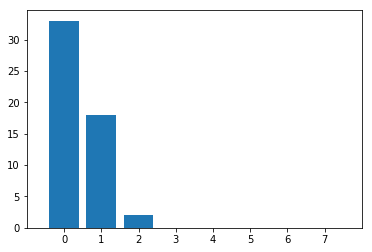

20180514   [17 24 29 45 46 49  5]   [38 33]   []
20180517   [ 7 21 25 29 35 37 13]   [37 35]   [35 37]
20180521   [ 8 10 16 30 37 44 17]   [37 35]   [37]
20180524   [11 25 26 34 36 42 16]   [39 34]   [34]
20180528   [ 5  9 27 28 30 44  2]   [39 35]   []
20180531   [11 13 24 26 47 49 33]   [39 37]   []
20180604   [20 22 31 37 43 45 27]   [41 33]   []
20180607   [12 20 29 31 37 39 42]   [41 34]   []
20180611   [16 25 30 37 44 49 34]   [38 34]   [34]
20180614   [ 4 29 31 35 42 48  1]   [37 34]   []
20180618   [11 15 22 23 26 43 25]   [37 34]   []
20180621   [ 4  6 15 24 30 35 46]   [41 35]   [35]
20180625   [ 2  5 25 38 44 48  9]   [39 36]   []
20180628   [ 2  7 22 27 40 47 48]   [39 39]   []
20180702   [12 13 26 33 35 38 23]   [41 36]   []
20180705   [ 8 11 28 30 32 34 39]   [41 35]   []
20180709   [ 6 23 31 38 39 43 33]   [41 35]   []
20180712   [ 4 15 25 32 40 41 10]   [37 39]   []
20180716   [ 4  8 19 24 32 47 22]   [37 33]   []
20180719   [13 14 23 35 37 46 45]   [41 35]   [35]
20180

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
q_models = []


mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

X = mtr.modified_dataset(getAllData(df)) #
scaler = MinMaxScaler()
scaler.fit(X)
Z = scaler.transform(X)


# q_model = GaussianNB()
# q_model = GradientBoostingRegressor()

# for i in range(1, 8):
#     q_model.fit(Z, mtr.getTarget(i))
#     q_models.append(deepcopy(q_model))

y_true = mtr.getTargets()
    
def getAllData4Prediction(df):
    drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U']
    X = df.drop(drop_cols, axis=1)
    return X

df_predicted = mtr.get_test_data()
newZ = scaler.transform(getAllData4Prediction(df_predicted))

df_top_seven = pd.DataFrame()

# for i in range (1, 8):
#     model = q_models[i-1]
#     s = 'P' + str(i)
#     df_top_seven[s] = model.predict(newZ).astype(int)

i = 1
for model in models:
    y_pred = model.predict(Z)
    s = 'P' + str(i)
    i = i +1
    df_top_seven[s] = model.predict(newZ).astype(int)
#    print(df_top_seven[s])




    
#print(df_top_seven)

r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
print ( "Accuracy: ",  r)
#dict_accuracy.update({s: r})
mtr.plot_matched_counts(df_top_seven.values)
mtr.print_predictions(df_top_seven)

print(df_top_seven)






In [11]:
  date	num1	num2	num3	num4	num5	num6	additional
Mon, 03 Dec 2018	5	6	7	29	37	38	23
Thu, 29 Nov 2018	4	11	19	25	40	44	1
Mon, 26 Nov 2018	16	22	28	31	38	46	33
Mon, 19 Nov 2018	2	9	14	36	46	48	5
Thu, 15 Nov 2018	21	25	27	36	39	44	18

SyntaxError: invalid syntax (<ipython-input-11-400d9849b0e0>, line 1)

In [ ]:
y_true = mtr.getTargets()
    
def getAllData4Prediction(df):
    drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U']
    X = df.drop(drop_cols, axis=1)
    return X

df_predicted = mtr.get_test_data()
newZ = scaler.transform(getAllData4Prediction(df_predicted))

df_top_seven = pd.DataFrame()

for i in range (1, 8):
    model = models[i-1]
    s = 'P' + str(i)
    df_top_seven[s] = model.predict(newZ)

    
#print(df_top_seven)

r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
print ( "Accuracy: ",  r)
#dict_accuracy.update({s: r})
mtr.plot_matched_counts(df_top_seven.values)
mtr.print_predictions(df_top_seven)




In [ ]:
date	num1	num2	num3	num4	num5	num6	additional
Mon, 03 Dec 2018	5	6	7	29	37	38	23
Thu, 29 Nov 2018	4	11	19	25	40	44	1
Mon, 26 Nov 2018	16	22	28	31	38	46	33
Mon, 19 Nov 2018	2	9	14	36	46	48	5
Thu, 15 Nov 2018	21	25	27	36	39	44	18

In [ ]:
print(scorer(best_model, Z, mtr.getTarget(1)))
print(best_model)

#model = SVC(kernel='rbf', gamma=100.0, C=10.0)
#model.fit(Z,mtr.getTarget(5))

model = best_model

y_pred = model.predict(Z)
print(scorer(model,Z, mtr.getTarget(5)))
#print(model)
#print(y_pred)


In [ ]:
y_true = mtr.getTargets()
iTotalMatched = 0
#for (t,p) in zip(y_true, y_pred):
matched_index = [t.__contains__(p) for (t,p) in zip(y_true, y_pred)]
print("Accuracy: ", 100*sum(matched_index)/len(y_true))

for (t,p) in zip(y_true, y_pred):
    print(t, ' ', p, ' ', t.__contains__(p) )
    

    
def getAllData4Prediction(df):
    drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U']
    X = df.drop(drop_cols, axis=1)
    return X

df = mtr.get_test_data()
newZ = scaler.transform(getAllData4Prediction(df))


y_pred = model.predict(newZ)
print(y_pred)

df['Predicted'] = y_pred

df_output = pd.DataFrame()
df_output['T'] = df['T']

df_output['Predicted'] = y_pred

print(df_output)


In [ ]:
df = pd.read_csv('prediction_data.csv')
df['Predicted'] = diagnosis_encoder.inverse_transform(y_pred)

print()
print(df.loc[:,['id', 'diagnosis','Predicted']])



print(svr.score(Z, mtr.getTarget(4)))

print(svr.best_score_)
print(svr.cv_results_)
#score(model, X_test, y_test)


In [ ]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'

g_all_pred = {}

X = mtr.modified_dataset(getAllData(df)) #
f = 1.0 #365/27.58
#    X = getAdjustedDataF(df,f)

scaler = StandardScaler()
#scaler = RobustScaler()
scaler.fit(X)
Z = scaler.transform(X)

for name, model in all_models:
    
    
#    scaler = None
#    Z = X

#     kfold = model_selection.KFold(n_splits=3, random_state=seed)
#     cv_results = model_selection.cross_val_score(model, Z, mtr.getTarget(3), cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
    
    oClassifier = MultiOutputClassifier(model, n_jobs=num_cores-2)
    oClassifier.fit(Z, mtr.getTargets()) 
    print(oClassifier)
    s = oClassifier.score(Z, mtr.getTargets())
    if(oClassifier.score(Z, mtr.getTargets()) == 1.0):
        print( name, ' ', str(f), ' ', str(s))
    store_prediction(mtr, oClassifier, f, scaler=scaler, name=name)
    start = time.clock()
    print(str(f), " Time taken: ", (time.clock() - start),  " ")

# for n in range(len(df_predictions)):
#     print( mtr.getAccuracyCount(np.array(df_predictions[n])))
#     mtr.print_predictions(df_predictions[n])






# boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

print('Done')

In [ ]:
import itertools
from itertools import combinations
import operator 
from itertools import islice

name_ = []

lst = [name for name, model in all_models]
iBestIndex = -1
iBestN = []
#print("List ", lst)
top_n = 12


dict_accuracy = {}
for z in range(5, 0,-1):
    a = [list(x) for x in itertools.combinations(lst, z) if len(x) > 1 ] 
#    print(a)

    for xx in a:
        test_pred = []
        s = ''
        combine_prediction(xx, test_pred)
#        print(s)

        #print(len(test_pred))

        all_pred = [] ;
        for i in range(len(test_pred)):
            if ( i == 0 ):
                all_pred = test_pred[i]
            else:
                all_pred = np.column_stack((all_pred, test_pred[i]) )

        top_seven = []
        for i in range(len(all_pred)):
            unique, counts = np.unique(all_pred[i], return_counts=True)
            x = dict(zip(unique, counts))
            sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
            l = list(islice([int(x) for x,y in sorted_x],top_n))
            while ( len(l) < top_n ):
                l.append(-1)

            top_seven.append(l)
            

#        print(len(top_seven))
#         if(len(top_seven[0]) < top_n ):
#             print("*** Caught ", )
        columns = ['N'+str(i+1) for i in range(len(top_seven[0]))]
#        print(columns)
        df_top_seven = pd.DataFrame(top_seven, columns=columns)
        r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
        matched, weighted_match = mtr.print_weighted_numbers(df_top_seven.values)
        r = sum(weighted_match)

        dict_accuracy.update({s: r})

t_accuracy = sorted(dict_accuracy.items(),key=operator.itemgetter(1), reverse=True)
print('Done')


In [ ]:
matched, weighted_match = mtr.print_weighted_numbers(df_top_seven.values)
print(matched)
print(weighted_match)

In [ ]:
n = 7
print(t_accuracy[:n])

a = [x[0].split('_') for x in t_accuracy[:n] ] 
print(a)
for xx in a:
    test_pred = []
    s = ''
    combine_prediction(xx, test_pred)
    all_pred = [] ;
    for i in range(len(test_pred)):
        if ( i == 0 ):
            all_pred = test_pred[i]
        else:
            all_pred = np.column_stack((all_pred, test_pred[i]) )

    top_seven = []
    for i in range(len(all_pred)):
        unique, counts = np.unique(all_pred[i], return_counts=True)
        x = dict(zip(unique, counts))
        sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
        l = list(islice([int(x) for x,y in sorted_x],top_n))
        while ( len(l) < top_n ):
          l.append(-1)
        top_seven.append(l)


    columns = ['N'+str(i+1) for i in range(len(top_seven[0]))]
    df_top_seven = pd.DataFrame(top_seven, columns=columns)
    r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
    print ( "Accuracy: ",  r)
    dict_accuracy.update({s: r})
    mtr.plot_matched_counts(df_top_seven.values)




In [ ]:

# Nov 26
# 16 22 28 31 38 46 33

In [ ]:
#Keep track of all results
#df_predictions = []

#print(df_predictions)
#mtr = MyTotoResearch(algo_no=1)
def getAllData(df):
#     drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U','K']
#     X = df.drop(drop_cols, axis=1)

    use_cols = ['Ph','il','age','dist','adia','sundist','sunadia']
    X = df[use_cols]
    return X

lresult, df = mtr.load_totodata()

test_data = mtr.get_test_data()
X = mtr.modified_dataset(getAllData(test_data)) #

print(len(df_predictions))
for n in range(len(df_predictions)):
    print( mtr.getAccuracyCount(np.array(df_predictions[n])))
    mtr.print_predictions(df_predictions[n])

